In [35]:
import matplotlib.pyplot as plt

import numpy as np

import pandas as pd

from scipy.special import erf

import scipy.stats as st

from sklearn.preprocessing import MinMaxScaler

from sklearn.preprocessing import StandardScaler

import seaborn as sb

from scipy import stats

# Лабораторная работа №1 

## Вариант

In [36]:
N = 25
cols = ['Daily_Usage_Hours', 'Sleep_Hours', 'Exercise_Hours', 'Screen_Time_Before_Bed', 'Time_on_Social_Media', 'Time_on_Gaming', 'Time_on_Education']
cols[N % 7]

'Time_on_Social_Media'

## Обзор данных

In [37]:
data = pd.read_csv('../datasets/teen_phone_addiction_dataset.csv')
data.head()

,ID,Name,Age,Gender,Location,School_Grade,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,...,Screen_Time_Before_Bed,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Phone_Usage_Purpose,Family_Communication,Weekend_Usage_Hours,Addiction_Level
0,1,Shannon Francis,13,Female,Hansonfort,9th,4.0,6.1,78,5,...,1.4,86,19,3.6,1.7,1.2,Browsing,4,8.7,10.0
1,2,Scott Rodriguez,17,Female,Theodorefort,7th,5.5,6.5,70,5,...,0.9,96,9,1.1,4.0,1.8,Browsing,2,5.3,10.0
2,3,Adrian Knox,13,Other,Lindseystad,11th,5.8,5.5,93,8,...,0.5,137,8,0.3,1.5,0.4,Education,6,5.7,9.2
3,4,Brittany Hamilton,18,Female,West Anthony,12th,3.1,3.9,78,8,...,1.4,128,7,3.1,1.6,0.8,Social Media,8,3.0,9.8
4,5,Steven Smith,14,Other,Port Lindsaystad,9th,2.5,6.7,56,4,...,1.0,96,20,2.6,0.9,1.1,Gaming,10,3.7,8.6


In [38]:
time_feature = data["Time_on_Social_Media"]

print(time_feature.info())
print("-------")
print("Пропуски:", data["Time_on_Social_Media"].isna().sum())

<class 'pandas.core.series.Series'>
RangeIndex: 3000 entries, 0 to 2999
Series name: Time_on_Social_Media
Non-Null Count  Dtype  
--------------  -----  
3000 non-null   float64
dtypes: float64(1)
memory usage: 23.6 KB
None
-------
Пропуски: 0


## I

### Основные характеристики

In [39]:
def print_metrics(feature): 
    metrics = {
        "Среднее": feature.mean(),
        "Дисперсия": feature.var(),
        "Медиана": feature.median(),
        "Мода": feature.mode().iloc[0] if not feature.mode().empty else None,
        "Квантиль 0.25": feature.quantile(0.25),
        "Квантиль 0.50": feature.quantile(0.50),
        "Квантиль 0.75": feature.quantile(0.75),
        "Интерквартильный размах": feature.quantile(0.75) - feature.quantile(0.25),
        "Эксцесс": feature.kurtosis(),
        "Асимметрия": feature.skew()
    }

    for name, value in metrics.items():
        if value is None:
            print(f"{name:30} отсутствует")
        else:
            print(f"{name:30} {value:.4f}")


print_metrics(time_feature)


Среднее                        2.4992
Дисперсия                      0.9765
Медиана                        2.5000
Мода                           2.7000
Квантиль 0.25                  1.8000
Квантиль 0.50                  2.5000
Квантиль 0.75                  3.2000
Интерквартильный размах        1.4000
Эксцесс                        -0.2132
Асимметрия                     0.0670


### Графики

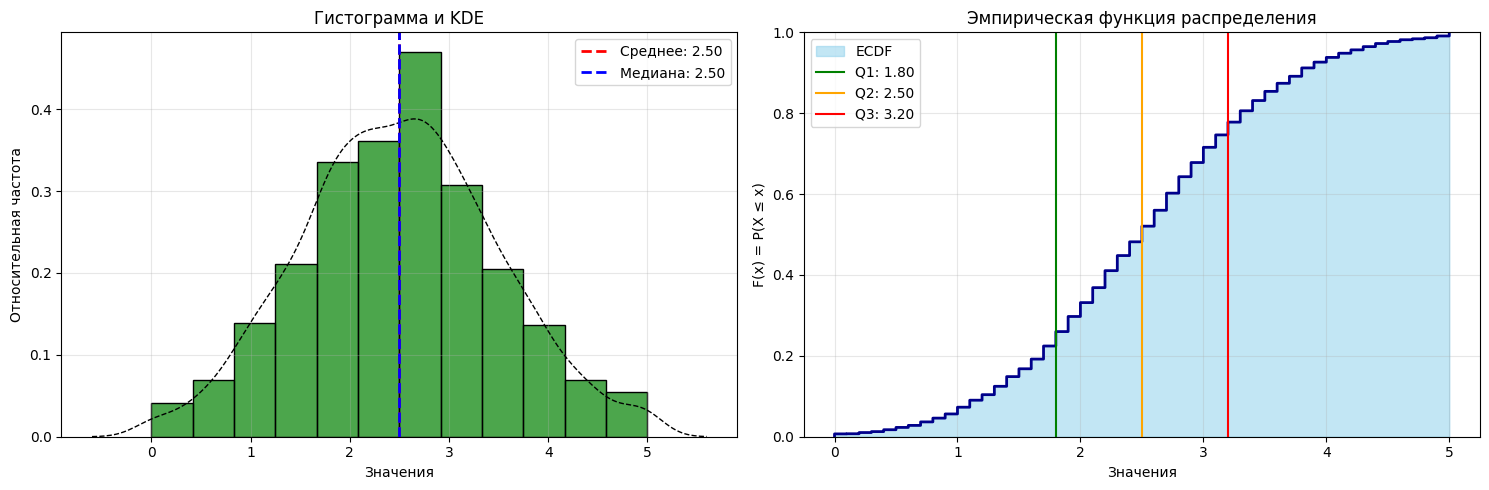

In [40]:
def make_plots(feature): 
    # Гистограмма относительных частот
    mean_val = feature.mean()
    median_val = feature.median()
    q25, q50, q75 = feature.quantile(0.25), feature.quantile(0.5), feature.quantile(0.75)

    # Разбиение по Стерджессу
    bins = int(np.log2(feature.size) + 1)

    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    sb.kdeplot(feature, color="black", linewidth=1, linestyle="--", bw_adjust=1,  ax=axes[0])
    sb.histplot(feature, bins=bins, ax=axes[0],
                color="green", edgecolor="black", alpha=0.7, stat="density")

    axes[0].axvline(mean_val, color="red", linestyle="--", linewidth=2,
                    label=f"Среднее: {mean_val:.2f}")
    axes[0].axvline(median_val, color="blue", linestyle="--", linewidth=2,
                    label=f"Медиана: {median_val:.2f}")

    axes[0].set_title(f"Гистограмма и KDE")
    axes[0].set_xlabel("Значения")
    axes[0].set_ylabel("Относительная частота")
    axes[0].legend()
    axes[0].grid(alpha=0.3)

    # Эмпирическая функция распределения 

    x = np.sort(feature)
    y = np.arange(1, len(x) + 1) / len(x)

    axes[1].fill_between(x, 0, y, step='post', color='skyblue', alpha=0.5, label="ECDF")
    axes[1].step(x, y, where='post', color='darkblue', linewidth=2)

    axes[1].axvline(q25, color="green", label=f"Q1: {q25:.2f}")
    axes[1].axvline(q50, color="orange", label=f"Q2: {q50:.2f}")
    axes[1].axvline(q75, color="red", label=f"Q3: {q75:.2f}")

    axes[1].set_title(f"Эмпирическая функция распределения")
    axes[1].set_xlabel("Значения")
    axes[1].set_ylabel("F(x) = P(X ≤ x)")
    axes[1].set_ylim(0, 1)
    axes[1].legend()
    axes[1].grid(alpha=0.3)

    plt.tight_layout()
    plt.show()

make_plots(time_feature)

## II
### Критерий $\chi^2$

Нулевая (H₀) и альтернативная (H₁) гипотезы:

H₀: Выборка взята из генеральной совокупности, имеющей нормальное распределение.

H₁: Выборка взята из генеральной совокупности, не имеющей нормального распределения.

In [41]:
n = len(time_feature)

In [42]:
def pirson_criteria(feature, n):
    # 1. Оценим выборочные параметры нормального распределения (для фактически имеющихся данных)
    mu = np.mean(feature)
    # ddof=1 для несмещенной оценки стандартного отклонения по выборке
    sigma = np.std(feature, ddof=1)

    print(f"Выборочное среднее mu: {mu:.4f}")
    print(f"Выборочная дисперсия sigma: {sigma:.4f}")

    # 2. Разобьем выборочные данные на интервалы (по Стерджесу)
    k = int(1 + np.log2(n))
    edges = np.linspace(np.min(feature), np.max(feature), k + 1)
    observed, _ = np.histogram(feature, bins=edges)

    # 3. Найдем ожидаемые частоты из нормального распределения
    def cdf_normal(m, s, x):
        z = (x - m) / s
        return 0.5 * (1 + erf(z / np.sqrt(2)))

    expected = []
    for i in range(len(edges) - 1):
        p_left = cdf_normal(mu, sigma, edges[i])
        p_right = cdf_normal(mu, sigma, edges[i+1])
        # вероятность попадания в интервал
        prob = p_right - p_left
        expected.append(round(n * prob))
    expected = np.array(expected)

    # 4. Объединим интервалы, где ожидаемая частота < 5
    min_freq = 5
    obs_combined, exp_combined = [], []
    cur_obs, cur_exp = 0, 0

    for i in range(len(observed)):
        cur_obs += observed[i]
        cur_exp += expected[i]
        if cur_exp >= min_freq or i == len(observed)-1:
            obs_combined.append(cur_obs)
            exp_combined.append(cur_exp)
            cur_obs, cur_exp = 0, 0

    obs_combined = np.array(obs_combined)
    exp_combined = np.array(exp_combined)

    print(f"\nКоличество интервалов: {len(obs_combined)}")
    print(f"Наблюдаемые частоты: {obs_combined}")
    print(f"Ожидаемые частоты: {exp_combined.round(2)}")

    # 5. Рассчитаем χ²-статистику
    chi_sq = np.sum((obs_combined - exp_combined)**2 / exp_combined)

    # Степени свободы: число интервалов - 1 - число оценённых параметров (μ и σ)
    df = len(obs_combined) - 1 - 2

    print(f"\nСтатистика хи-квадрат: {chi_sq:.4f}")
    print(f"Степени свободы: {df}")

    if df > 0:
        # alpha=0.05 - пороговый уровень значимости, 
        # мы готовы допустить 5%-ную вероятность ошибочно отвергнуть верную нулевую гипотезу
        critical = stats.chi2.ppf(0.95, df)  
        # Высокая вероятность получить такие данные как исходные при нормальном распределении
        p_val = 1 - stats.chi2.cdf(chi_sq, df)

        print(f"Критическое значение (alpha=0.05): {critical:.4f}")
        print(f"p-value: {p_val:.4f}")

        if chi_sq <= critical:
            print("\nРезультат: данные соответствуют нормальному распределению")
        else:
            print("\nРезультат: данные не соответсвуют нормальному распределению")
    else:
        print("Недостаточно степеней свободы для проведения теста")

pirson_criteria(time_feature, n)

Выборочное среднее mu: 2.4992
Выборочная дисперсия sigma: 0.9882

Количество интервалов: 12
Наблюдаемые частоты: [ 52  86 174 264 419 451 588 384 256 171  87  68]
Ожидаемые частоты: [ 35  85 172 290 412 490 490 411 290 171  85  35]

Статистика хи-квадрат: 70.3675
Степени свободы: 9
Критическое значение (alpha=0.05): 16.9190
p-value: 0.0000

Результат: данные не соответсвуют нормальному распределению


На основании проведенного критерия хи-квадрат Пирсона гипотеза о нормальном распределении данных статистически значимо отвергается на уровне значимости α = 0.05.

**Статистическое обоснование**
Статистика хи-квадрат: 70.37 (значительно превышает критическое значение 16.92 для 9 степеней свободы при α = 0.05)
p-value: < 0.0001 (чрезвычайно малая вероятность)

**Анализ расхождений**

Сравнение наблюдаемых и ожидаемых частот показывает систематическое несоответствие:

В центральной части распределения (интервалы 5-7: 419 vs 412, 451 vs 490, 588 vs 490) наблюдаются значимые расхождения
В "хвостах" распределения также имеются заметные отклонения от теоретической нормальной модели

### Критерии ассиметрии и эксцесса

**Асимметрия** - показывает, насколько распределение симметрично вокруг среднего. 0 → идеально симметрично (норма), >0 → правый хвост длиннее, <0 → левый хвост длиннее.

**Эксцесс** - показывает, насколько распределение «остроконечное» или «плоское» по сравнению с нормальным.

**Стандартная ошибка** - показывает, насколько естественно колеблются показатели асимметрии и эксцесса в выборках данного размера.

**Z-статистика** = показатель/стандартная ошибка. Если |Z| ≤ критическое значение, показатель в пределах нормы.

**p-value** - вероятность получить такую или большую Z-статистику случайно, если данные нормальны.

Данные считаются нормальными только если оба показателя (асимметрия и эксцесс) не выходят за пределы критических значений.

In [43]:
def skew_and_kurtosis(feature, n):
    # 1. Рассчитаем показатели асимметрии и эксцесса
    skew_val = feature.skew()          
    kurt_val = feature.kurtosis()    

    print(f"Асимметрия: {skew_val:.4f}")
    print(f"Эксцесс: {kurt_val:.4f}")

    # 2. Рассчитаем стандартные ошибки для этих показателей
    se_skew = np.sqrt(6 * (n - 2) / ((n + 1) * (n + 3)))
    se_kurt = np.sqrt(24 * n * (n - 2) * (n - 3) /
                    ((n + 1)**2 * (n + 3) * (n + 5)))

    print(f"Стандартная ошибка асимметрии: {se_skew:.4f}")
    print(f"Стандартная ошибка эксцесса: {se_kurt:.4f}")

    # 3. Вычисляем Z-статистики
    z_skew = skew_val / se_skew
    z_kurt = kurt_val / se_kurt

    print(f"Z-статистика для асимметрии: {z_skew:.4f}")
    print(f"Z-статистика для эксцесса: {z_kurt:.4f}")

    # 4. Критическое значение Z для выбранного уровня значимости
    alpha = 0.05
    z_crit = stats.norm.ppf(1 - alpha/2)
    print(f"Критическое значение Z (alpha={alpha}): ±{z_crit:.4f}")

    # 5. Проверка гипотез
    skew_ok = abs(z_skew) <= z_crit       # True, если асимметрия в пределах нормы
    kurt_ok = abs(z_kurt) <= z_crit       # True, если эксцесс в пределах нормы
    overall_normal = skew_ok and kurt_ok  # True, если оба критерия выполняются

    print(f"Асимметрия: {'Соответствует нормальному распределению' if skew_ok else 'НЕ соответствует'}")
    print(f"Эксцесс: {'Соответствует нормальному распределению' if kurt_ok else 'НЕ соответствует'}")
    print(f"Общий вывод: {'Данные соответствуют нормальному распределению' if overall_normal else 'Данные не соответствуют нормальному распределению'}")

    # 6. Вычисляем p-values
    p_val_skew = 2 * (1 - stats.norm.cdf(abs(z_skew)))
    p_val_kurt = 2 * (1 - stats.norm.cdf(abs(z_kurt)))

    print(f"\np-values:")
    print(f"Асимметрия: {p_val_skew:.4f}")
    print(f"Эксцесс: {p_val_kurt:.4f}")


skew_and_kurtosis(time_feature, n)


Асимметрия: 0.0670
Эксцесс: -0.2132
Стандартная ошибка асимметрии: 0.0447
Стандартная ошибка эксцесса: 0.0892
Z-статистика для асимметрии: 1.4991
Z-статистика для эксцесса: -2.3899
Критическое значение Z (alpha=0.05): ±1.9600
Асимметрия: Соответствует нормальному распределению
Эксцесс: НЕ соответствует
Общий вывод: Данные не соответствуют нормальному распределению

p-values:
Асимметрия: 0.1339
Эксцесс: 0.0169


Так как один из критериев (эксцесс) не удовлетворяет нормальности, данные в целом не соответствуют нормальному распределению.
Другими словами, распределение близко к нормальному по симметрии, но имеет немного «плоский» хвост.

### Q-Q Plot

Quantile-Quantile plot — графический инструмент для проверки, насколько выборка данных соответствует теоретическому распределению.

На оси X откладываются теоретические квантили нормального распределения.

На оси Y откладываются выборочные квантили стандартизованных данных.

Если точки лежат на линии y = x, значит данные хорошо соответствуют нормальному распределению.

Корреляция между теоретическими и выборочными квантилями (должен стремиться к 1): 0.9983
данные очень хорошо соответствуют нормальному распределению


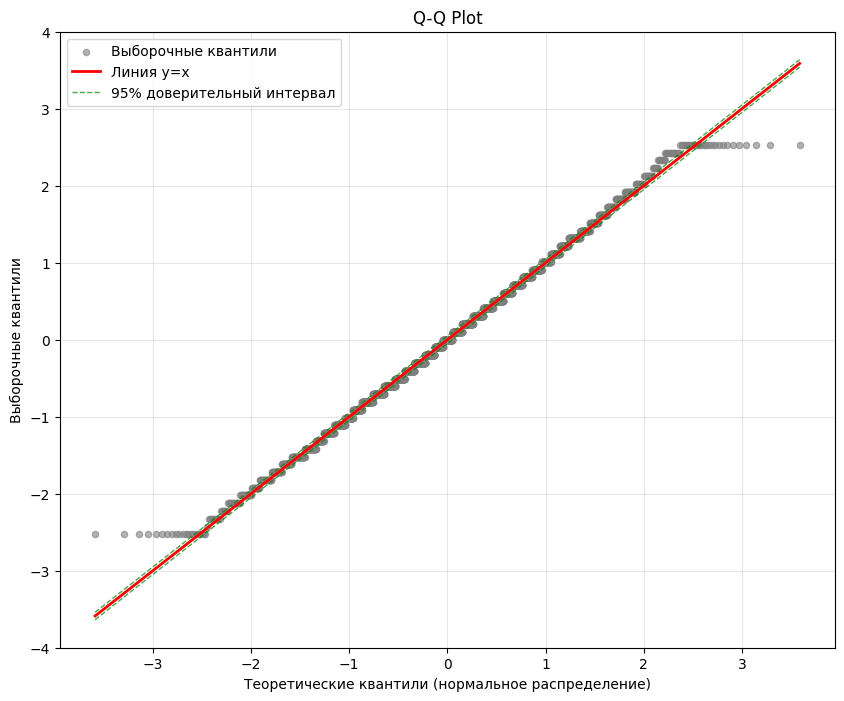

In [44]:
def q_q_plot(feature, n):
    sorted_feature = feature.sort_values()

    # Рассчитываем позиции и квантили
    positions = (np.arange(1, n + 1) - 0.5) / n
    theor_q = stats.norm.ppf(positions)  # теоретические квантили

    mean_val = sorted_feature.mean()
    std_val = sorted_feature.std(ddof=1)
    std_data = (sorted_feature - mean_val) / std_val  # стандартизируем выборку

    # Строим Q-Q plot
    plt.figure(figsize=(10, 8))
    plt.scatter(theor_q, std_data, alpha=0.6, s=20, color='grey', label='Выборочные квантили')

    # Идеальная линия нормальности
    min_q = min(theor_q.min(), std_data.min())
    max_q = max(theor_q.max(), std_data.max())
    plt.plot([min_q, max_q], [min_q, max_q], 'r-', linewidth=2, label='Линия y=x')

    # 95% доверительный интервал (для визуальной проверки)
    se_approx = 1.36 / np.sqrt(n)
    plt.plot(theor_q, theor_q + 1.96*se_approx, 'g--', alpha=0.7, linewidth=1, label='95% доверительный интервал')
    plt.plot(theor_q, theor_q - 1.96*se_approx, 'g--', alpha=0.7, linewidth=1)


    plt.xlabel('Теоретические квантили (нормальное распределение)')
    plt.ylabel('Выборочные квантили')
    plt.title(f'Q-Q Plot')
    plt.grid(True, alpha=0.3)
    plt.legend()

    corr_val = np.corrcoef(theor_q, std_data)[0, 1]

    # Коэффициент корреляции
    print("Корреляция между теоретическими и выборочными квантилями (должен стремиться к 1):", f"{corr_val:.4f}")

    # Интерпретация
    if corr_val > 0.99:
        print("данные очень хорошо соответствуют нормальному распределению")
    elif corr_val > 0.95:
        print("данные хорошо соответствуют нормальному распределению")
    elif corr_val > 0.90:
        print("данные приблизительно соответствуют нормальному распределению")
    else:
        print("данные плохо соответствуют нормальному распределению")

q_q_plot(time_feature, n)


Как можно видеть, результаты достаточно противоречивы, так как некоторые из реализованных критериев отвергают $H_0$ (эксцесс, кр. Пирсона), другие же её подтверждают (QQ-plot, симметрия). Если рассматривать графики п.I, видно, что визуально распределение достаточно схоже с нормальным, но мода смещена вправо, а его"хвосты" слишком плоские в сравнении с нормальным распределением. 

## III
### Стандартизация и нормировка

Стандартизация (Z-score) - это преобразование данных, при котором среднее значение становится равным 0, а стандартное отклонение - 1. 

In [45]:
def full_stats(feature):
    print_metrics(feature)
    make_plots(feature)
    pirson_criteria(feature, len(feature))
    skew_and_kurtosis(feature, len(feature))
    q_q_plot(feature, len(feature))

Среднее                        -0.0000
Дисперсия                      1.0003
Медиана                        0.0008
Мода                           0.2032
Квантиль 0.25                  -0.7077
Квантиль 0.50                  0.0008
Квантиль 0.75                  0.7093
Интерквартильный размах        1.4170
Эксцесс                        -0.2132
Асимметрия                     0.0670


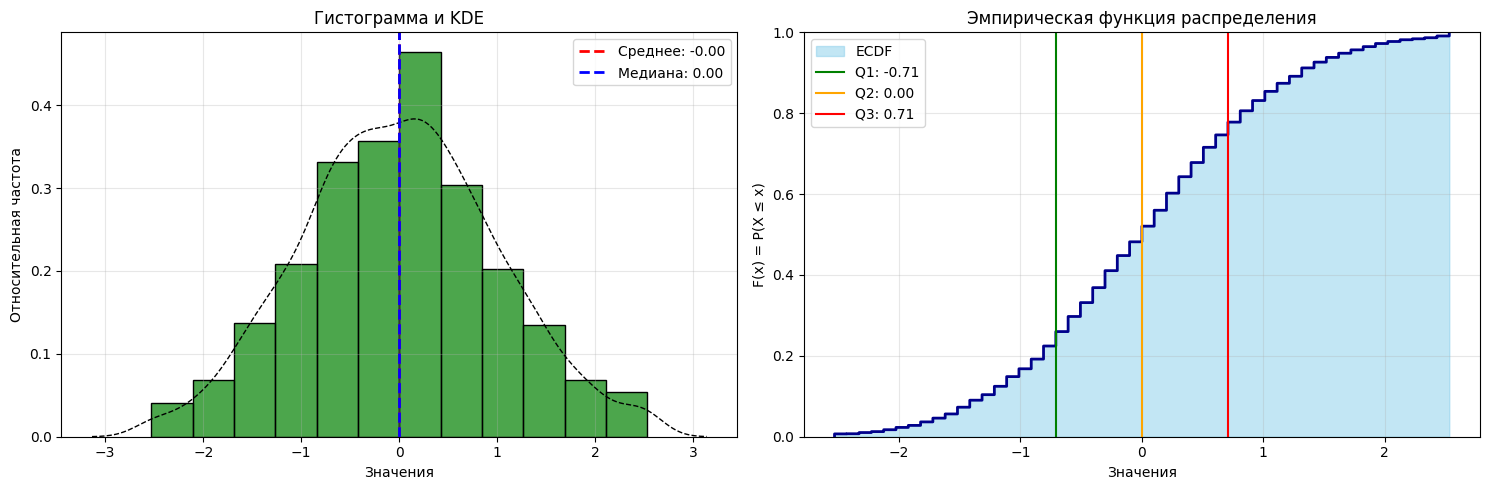

Выборочное среднее mu: -0.0000
Выборочная дисперсия sigma: 1.0002

Количество интервалов: 12
Наблюдаемые частоты: [ 52  86 174 264 419 451 588 384 256 171  87  68]
Ожидаемые частоты: [ 35  85 172 290 412 490 490 411 290 171  85  35]

Статистика хи-квадрат: 70.3675
Степени свободы: 9
Критическое значение (alpha=0.05): 16.9190
p-value: 0.0000

Результат: данные не соответсвуют нормальному распределению
Асимметрия: 0.0670
Эксцесс: -0.2132
Стандартная ошибка асимметрии: 0.0447
Стандартная ошибка эксцесса: 0.0892
Z-статистика для асимметрии: 1.4991
Z-статистика для эксцесса: -2.3899
Критическое значение Z (alpha=0.05): ±1.9600
Асимметрия: Соответствует нормальному распределению
Эксцесс: НЕ соответствует
Общий вывод: Данные не соответствуют нормальному распределению

p-values:
Асимметрия: 0.1339
Эксцесс: 0.0169
Корреляция между теоретическими и выборочными квантилями (должен стремиться к 1): 0.9983
данные очень хорошо соответствуют нормальному распределению


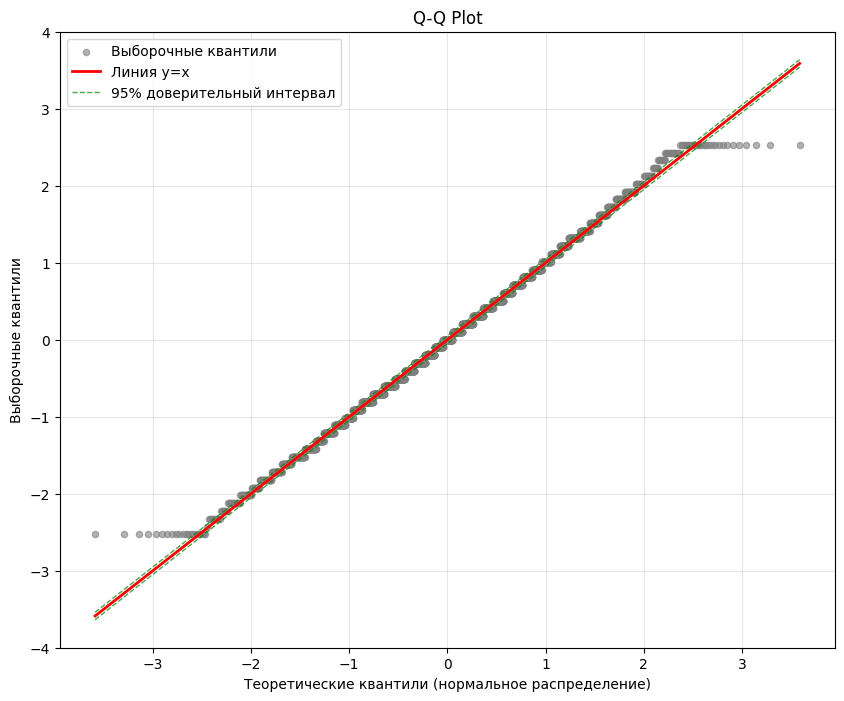

In [46]:
def process_standand(original_series):
    original_index = original_series.index
    original_name = original_series.name
    
    time_numpy_2d = original_series.values.reshape(-1, 1)
    scaler = StandardScaler()
    time_standardized_2d = scaler.fit_transform(time_numpy_2d)
    time_standardized_1d = time_standardized_2d.flatten()
    
    standardized_series = pd.Series(
        time_standardized_1d,
        index=original_index,         
        name=f"{original_name}" 
    )
    
    return standardized_series


time_stand = process_standand(time_feature)

full_stats(time_stand)

Нормировка (Min-Max scaling) - это преобразование данных к заданному диапазону  [0, 1].

Среднее                        0.4998
Дисперсия                      0.0391
Медиана                        0.5000
Мода                           0.5400
Квантиль 0.25                  0.3600
Квантиль 0.50                  0.5000
Квантиль 0.75                  0.6400
Интерквартильный размах        0.2800
Эксцесс                        -0.2132
Асимметрия                     0.0670


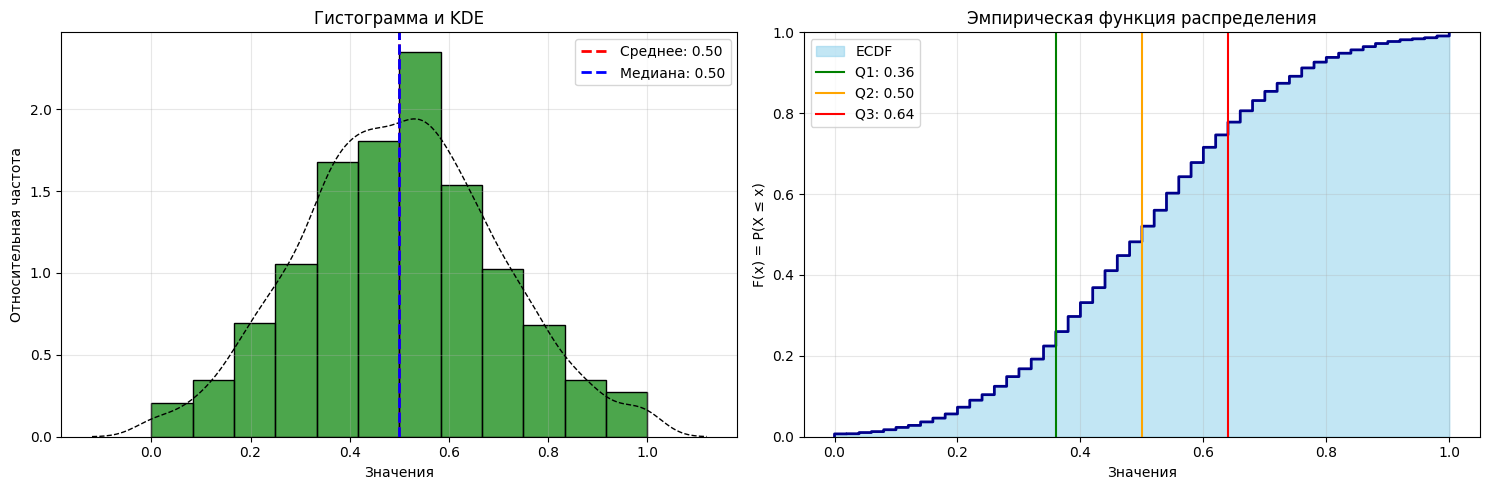

Выборочное среднее mu: 0.4998
Выборочная дисперсия sigma: 0.1976

Количество интервалов: 12
Наблюдаемые частоты: [ 52  86 174 264 419 451 588 384 256 171  87  68]
Ожидаемые частоты: [ 35  85 172 290 412 490 490 411 290 171  85  35]

Статистика хи-квадрат: 70.3675
Степени свободы: 9
Критическое значение (alpha=0.05): 16.9190
p-value: 0.0000

Результат: данные не соответсвуют нормальному распределению
Асимметрия: 0.0670
Эксцесс: -0.2132
Стандартная ошибка асимметрии: 0.0447
Стандартная ошибка эксцесса: 0.0892
Z-статистика для асимметрии: 1.4991
Z-статистика для эксцесса: -2.3899
Критическое значение Z (alpha=0.05): ±1.9600
Асимметрия: Соответствует нормальному распределению
Эксцесс: НЕ соответствует
Общий вывод: Данные не соответствуют нормальному распределению

p-values:
Асимметрия: 0.1339
Эксцесс: 0.0169
Корреляция между теоретическими и выборочными квантилями (должен стремиться к 1): 0.9983
данные очень хорошо соответствуют нормальному распределению


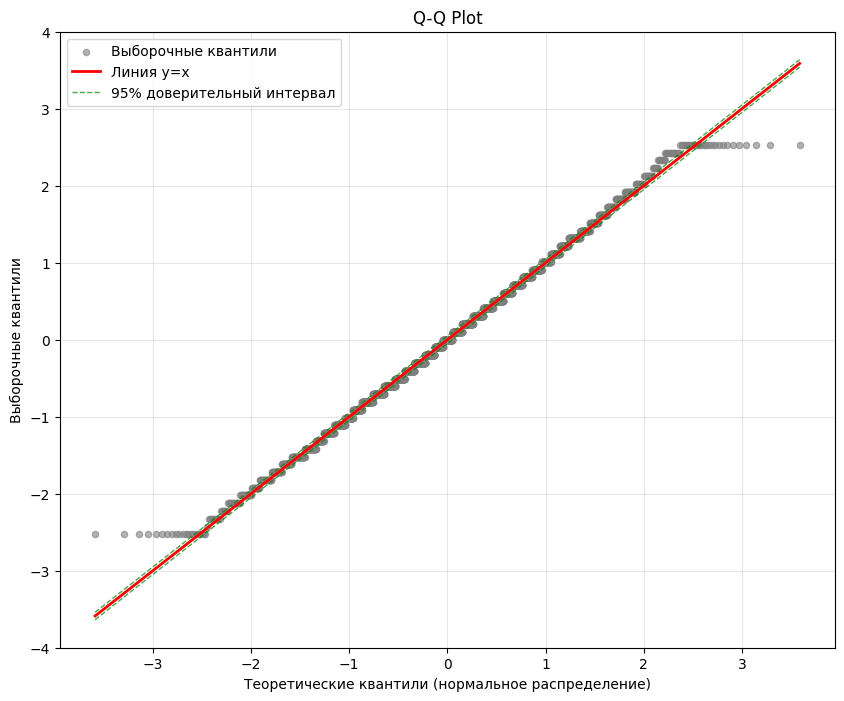

In [47]:
def process_norm(original_series):
    original_index = original_series.index
    original_name = original_series.name
    
    time_numpy_2d = original_series.values.reshape(-1, 1)
    scaler = MinMaxScaler()
    time_standardized_2d = scaler.fit_transform(time_numpy_2d)
    time_standardized_1d = time_standardized_2d.flatten()
    
    standardized_series = pd.Series(
        time_standardized_1d,
        index=original_index,         
        name=f"{original_name}" 
    )
    
    return standardized_series


time_norm = process_norm(time_feature)

full_stats(time_norm)

Результат не изменился, что естественно, так как стандартизация и нормировка изменяют только масштаб и смещение данных, но не меняют форму распределения, после преобразований оно останется таким же, но в другом числовом диапазоне.

### Удаление, усечение выбросов

Среднее                        2.4998
Дисперсия                      0.9653
Медиана                        2.5000
Мода                           2.7000
Квантиль 0.25                  1.8000
Квантиль 0.50                  2.5000
Квантиль 0.75                  3.2000
Интерквартильный размах        1.4000
Эксцесс                        -0.2900
Асимметрия                     0.0755


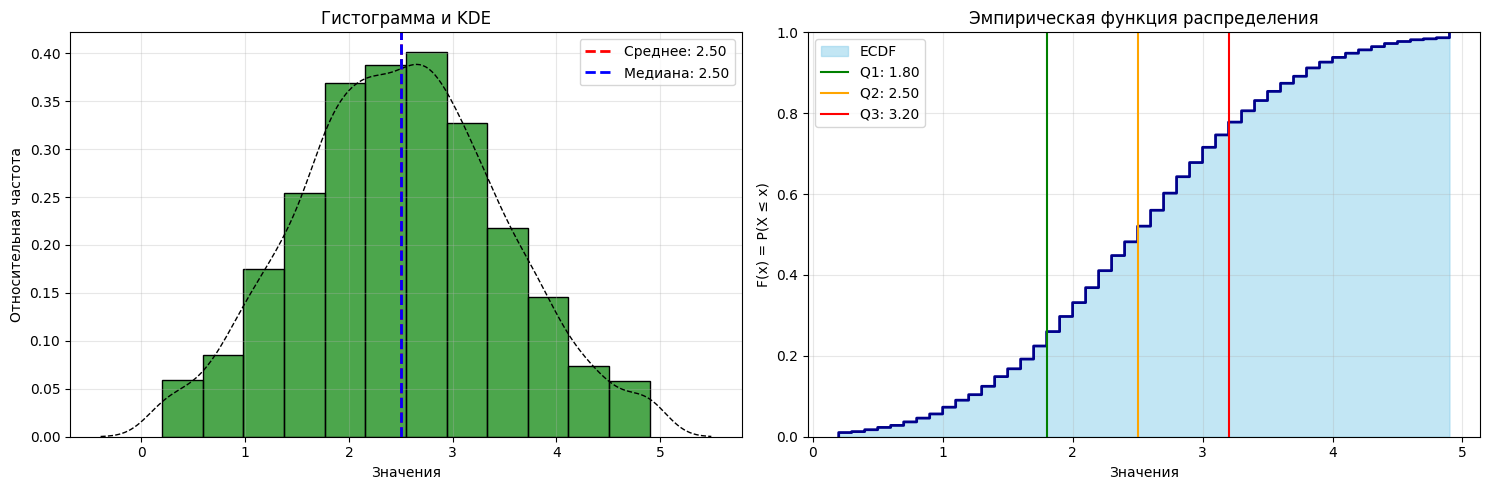

Выборочное среднее mu: 2.4998
Выборочная дисперсия sigma: 0.9825

Количество интервалов: 12
Наблюдаемые частоты: [ 69 100 205 299 433 456 472 384 256 171  87  68]
Ожидаемые частоты: [ 49 106 194 305 409 469 460 385 276 169  88  40]

Статистика хи-квадрат: 32.4132
Степени свободы: 9
Критическое значение (alpha=0.05): 16.9190
p-value: 0.0002

Результат: данные не соответсвуют нормальному распределению
Асимметрия: 0.0755
Эксцесс: -0.2900
Стандартная ошибка асимметрии: 0.0447
Стандартная ошибка эксцесса: 0.0892
Z-статистика для асимметрии: 1.6903
Z-статистика для эксцесса: -3.2503
Критическое значение Z (alpha=0.05): ±1.9600
Асимметрия: Соответствует нормальному распределению
Эксцесс: НЕ соответствует
Общий вывод: Данные не соответствуют нормальному распределению

p-values:
Асимметрия: 0.0910
Эксцесс: 0.0012
Корреляция между теоретическими и выборочными квантилями (должен стремиться к 1): 0.9976
данные очень хорошо соответствуют нормальному распределению


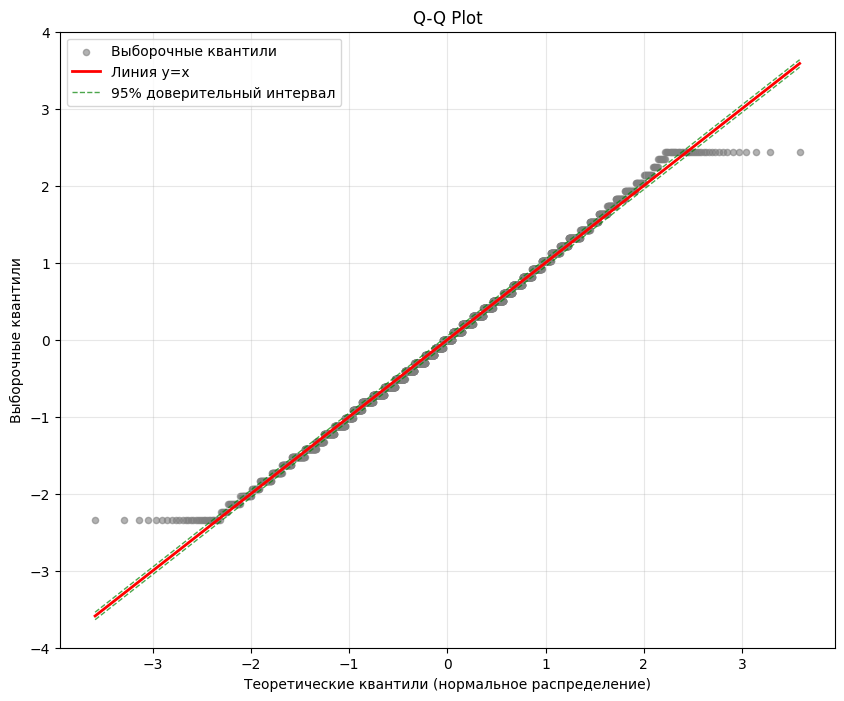

In [48]:
def remove_outliers(data, lowerQuantile, upperQuantile):
    lower_limit = data.quantile(lowerQuantile)
    upper_limit = data.quantile(upperQuantile)
    return data.clip(lower=lower_limit, upper=upper_limit)

time_no_outliers = remove_outliers(time_feature, 0.01, 0.99)

full_stats(time_no_outliers)

Статистика хи-квадрат очевидно уменьшилась на счет удаления "плоских хвостов" распределения. Но остальные Результаты не улучшились, а визуально распределение даже еще меньше стало походить на нормальное, так что считать этот метод обработки данных эффективным не стоит

### Другие преобразования

Log

Среднее                        1.2076
Дисперсия                      0.0979
Медиана                        1.2528
Мода                           1.3083
Квантиль 0.25                  1.0296
Квантиль 0.50                  1.2528
Квантиль 0.75                  1.4351
Интерквартильный размах        0.4055
Эксцесс                        1.2591
Асимметрия                     -0.8856


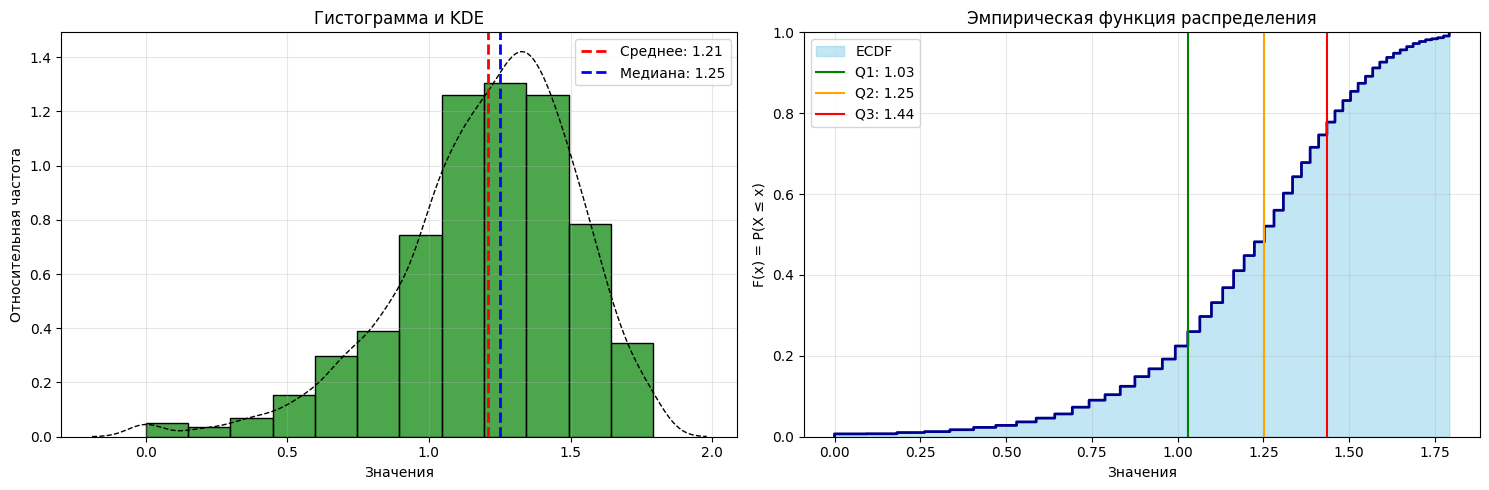

Выборочное среднее mu: 1.2076
Выборочная дисперсия sigma: 0.3130

Количество интервалов: 11
Наблюдаемые частоты: [ 38  31  69 133 175 334 564 585 565 351 155]
Ожидаемые частоты: [  5  17  54 134 268 427 544 555 453 295 154]

Статистика хи-квадрат: 326.7161
Степени свободы: 8
Критическое значение (alpha=0.05): 15.5073
p-value: 0.0000

Результат: данные не соответсвуют нормальному распределению
Асимметрия: -0.8856
Эксцесс: 1.2591
Стандартная ошибка асимметрии: 0.0447
Стандартная ошибка эксцесса: 0.0892
Z-статистика для асимметрии: -19.8234
Z-статистика для эксцесса: 14.1126
Критическое значение Z (alpha=0.05): ±1.9600
Асимметрия: НЕ соответствует
Эксцесс: НЕ соответствует
Общий вывод: Данные не соответствуют нормальному распределению

p-values:
Асимметрия: 0.0000
Эксцесс: 0.0000
Корреляция между теоретическими и выборочными квантилями (должен стремиться к 1): 0.9785
данные хорошо соответствуют нормальному распределению
Arcsinh

Среднее                        1.5781
Дисперсия             

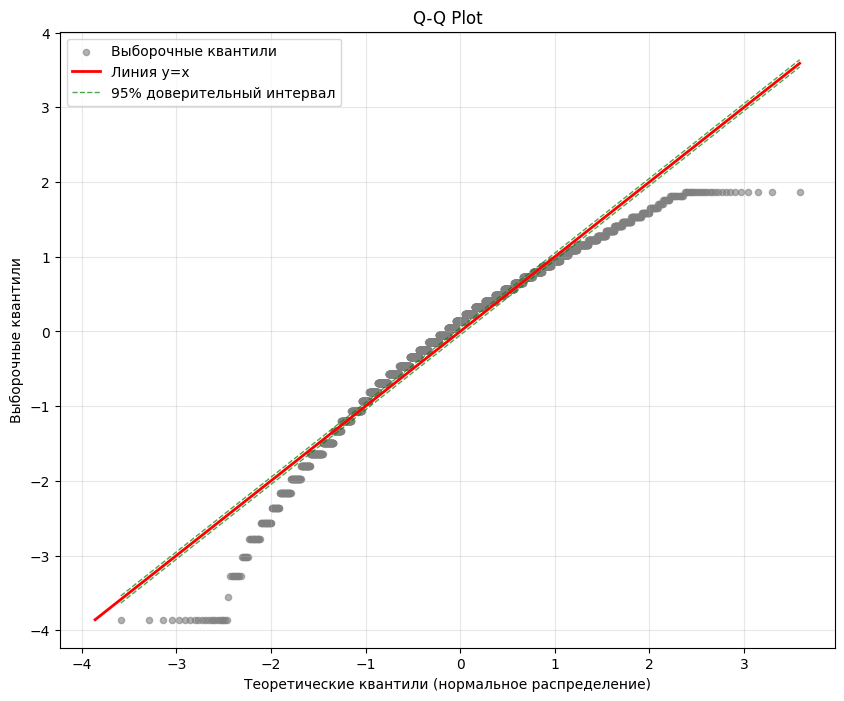

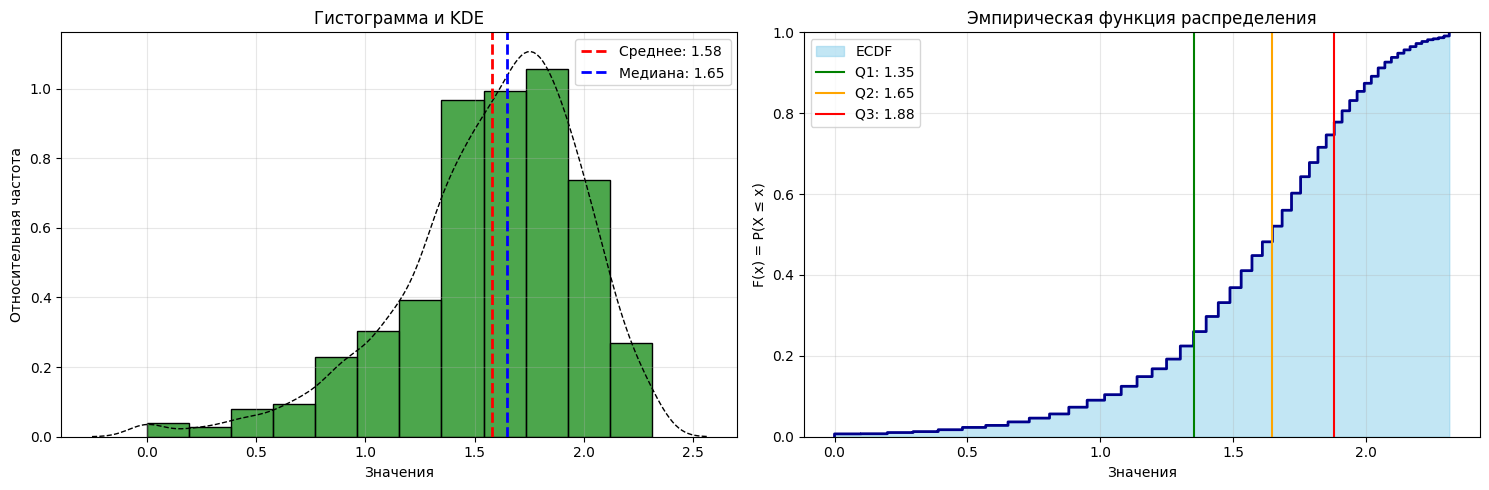

Выборочное среднее mu: 1.5781
Выборочная дисперсия sigma: 0.4139

Количество интервалов: 11
Наблюдаемые частоты: [ 38  46  54 133 175 227 559 575 611 427 155]
Ожидаемые частоты: [  6  18  53 130 256 408 525 547 460 313 172]

Статистика хи-квадрат: 416.6394
Степени свободы: 8
Критическое значение (alpha=0.05): 15.5073
p-value: 0.0000

Результат: данные не соответсвуют нормальному распределению
Асимметрия: -0.9762
Эксцесс: 1.3299
Стандартная ошибка асимметрии: 0.0447
Стандартная ошибка эксцесса: 0.0892
Z-статистика для асимметрии: -21.8511
Z-статистика для эксцесса: 14.9063
Критическое значение Z (alpha=0.05): ±1.9600
Асимметрия: НЕ соответствует
Эксцесс: НЕ соответствует
Общий вывод: Данные не соответствуют нормальному распределению

p-values:
Асимметрия: 0.0000
Эксцесс: 0.0000
Корреляция между теоретическими и выборочными квантилями (должен стремиться к 1): 0.9734
данные хорошо соответствуют нормальному распределению
Sqrt

Среднее                        1.5420
Дисперсия                

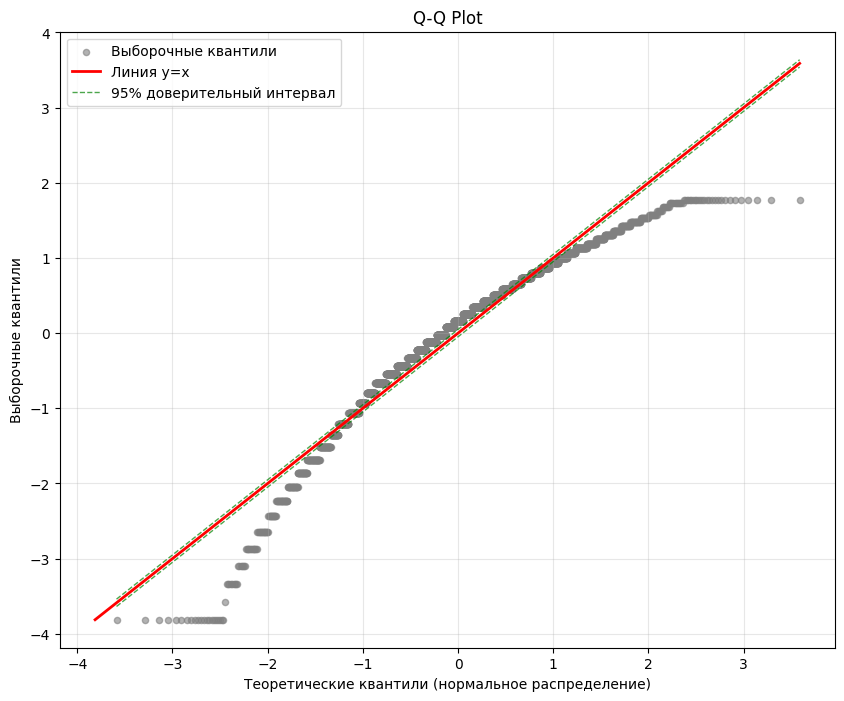

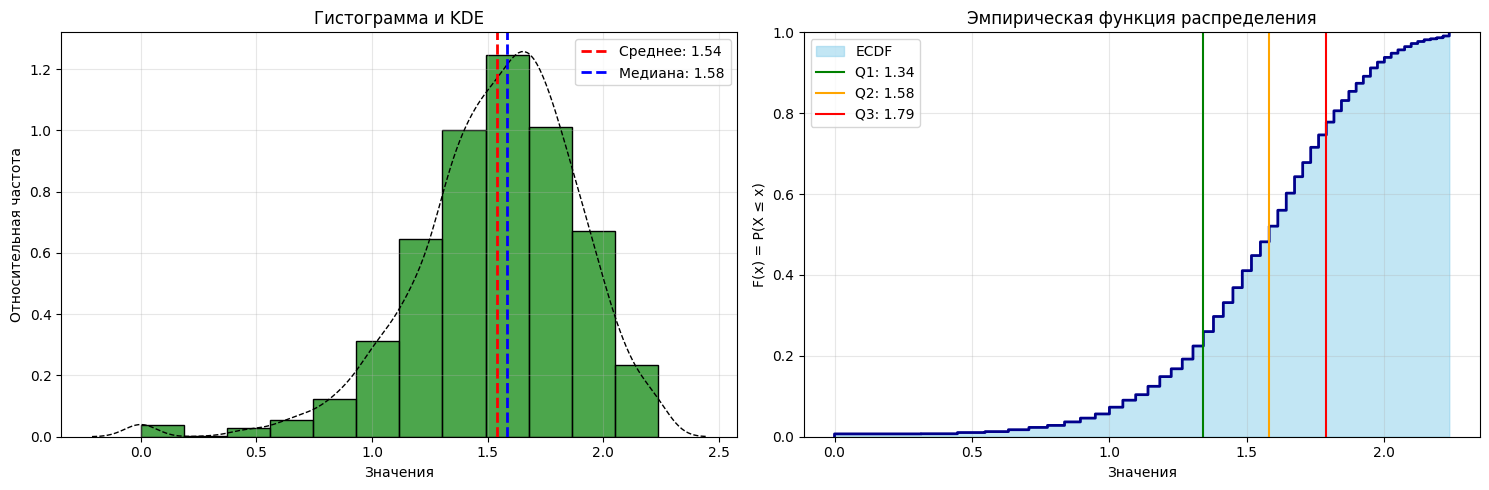

Выборочное среднее mu: 1.5420
Выборочная дисперсия sigma: 0.3484

Количество интервалов: 10
Наблюдаемые частоты: [ 38  31  69 174 361 559 697 565 376 130]
Ожидаемые частоты: [  7  26  86 216 407 582 628 513 317 148]

Статистика хи-квадрат: 181.9048
Степени свободы: 7
Критическое значение (alpha=0.05): 14.0671
p-value: 0.0000

Результат: данные не соответсвуют нормальному распределению
Асимметрия: -0.9129
Эксцесс: 2.0839
Стандартная ошибка асимметрии: 0.0447
Стандартная ошибка эксцесса: 0.0892
Z-статистика для асимметрии: -20.4345
Z-статистика для эксцесса: 23.3572
Критическое значение Z (alpha=0.05): ±1.9600
Асимметрия: НЕ соответствует
Эксцесс: НЕ соответствует
Общий вывод: Данные не соответствуют нормальному распределению

p-values:
Асимметрия: 0.0000
Эксцесс: 0.0000
Корреляция между теоретическими и выборочными квантилями (должен стремиться к 1): 0.9789
данные хорошо соответствуют нормальному распределению


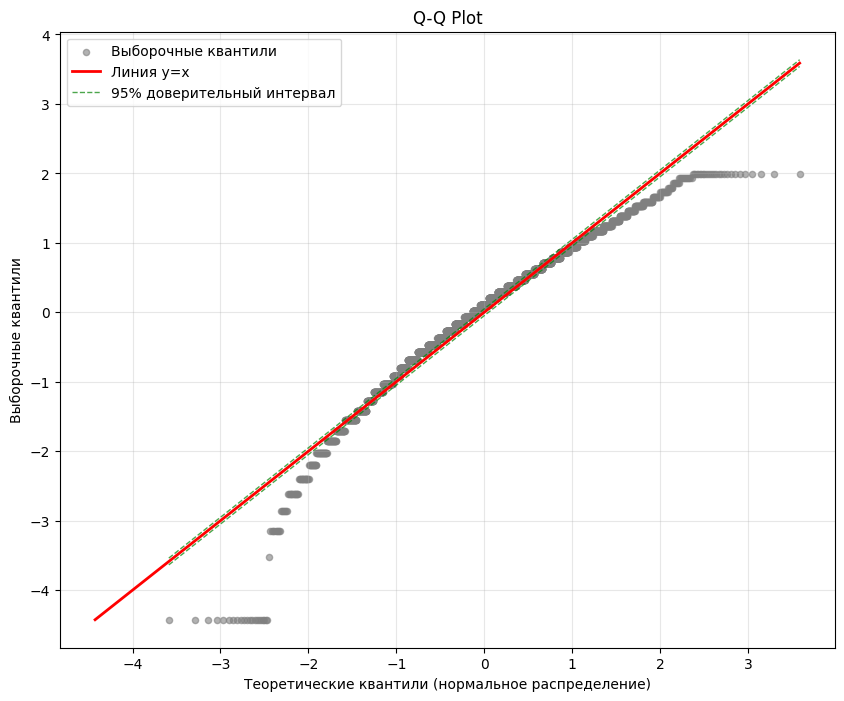

In [49]:
time_log = np.log1p(time_feature)
time_arcsinh = np.arcsinh(time_feature)
time_sqrt = np.sqrt(time_feature)

print("Log\n")
full_stats(time_log)
print("Arcsinh\n")
full_stats(time_arcsinh)
print("Sqrt\n")
full_stats(time_sqrt)

Более чем очевидно, что логаримфирование и др. преобразования не улучшают общую картину. Как итог, наилучшее соответствие нормальному распределению показывают исходные данные до преобразований

## IV


In [50]:
grades = data['School_Grade'].value_counts().sort_index()
print(grades)

class_groups = data.groupby('School_Grade')['Time_on_Social_Media']


School_Grade
10th    487
11th    479
12th    529
7th     497
8th     482
9th     526
Name: count, dtype: int64


Распределение учащихся по классам демонстрирует сбалансированность выборки, что подтверждается приблизительно равными размерами групп. Баланс между группами  повышает надежность статистических сравнений. 

In [51]:
group_stats = []

for i, (grade, group_data) in enumerate(class_groups):
    print(f"\n{grade} класс:")
    
    count = len(group_data)
    mean_val = group_data.mean()
    std_val = group_data.std()
    median_val = group_data.median()
    q1 = group_data.quantile(0.25)
    q3 = group_data.quantile(0.75)
    variance = group_data.var()
    skewness = group_data.skew()
    kurtosis = group_data.kurtosis()
    
    print(f"Количество наблюдений: {count}")
    print(f"Среднее значение: {mean_val:.2f}")
    print(f"Стандартное отклонение: {std_val:.2f}")
    print(f"Медиана: {median_val:.2f}")
    print(f"Первый квартиль (Q1): {q1:.2f}")
    print(f"Третий квартиль (Q3): {q3:.2f}")
    print(f"Межквартильный размах (IQR): {q3 - q1:.2f}")
    print(f"Дисперсия: {variance:.2f}")
    print(f"Асимметрия: {skewness:.2f}")
    print(f"Эксцесс: {kurtosis:.2f}")
    print("\n")

    group_stats.append({
        'mean': mean_val,
        'variance': variance,
    })

group_stats = pd.DataFrame(group_stats)
print(f"Межгрупповая дисперсия: {group_stats['mean'].var():.4f}")
print(f"Средняя внутригрупповая дисперсия: {group_stats['variance'].mean():.4f}")


10th класс:
Количество наблюдений: 487
Среднее значение: 2.52
Стандартное отклонение: 0.96
Медиана: 2.50
Первый квартиль (Q1): 1.90
Третий квартиль (Q3): 3.20
Межквартильный размах (IQR): 1.30
Дисперсия: 0.92
Асимметрия: 0.03
Эксцесс: -0.11



11th класс:
Количество наблюдений: 479
Среднее значение: 2.49
Стандартное отклонение: 0.97
Медиана: 2.50
Первый квартиль (Q1): 1.80
Третий квартиль (Q3): 3.10
Межквартильный размах (IQR): 1.30
Дисперсия: 0.95
Асимметрия: 0.04
Эксцесс: -0.11



12th класс:
Количество наблюдений: 529
Среднее значение: 2.46
Стандартное отклонение: 1.01
Медиана: 2.40
Первый квартиль (Q1): 1.80
Третий квартиль (Q3): 3.20
Межквартильный размах (IQR): 1.40
Дисперсия: 1.01
Асимметрия: 0.09
Эксцесс: -0.28



7th класс:
Количество наблюдений: 497
Среднее значение: 2.54
Стандартное отклонение: 0.96
Медиана: 2.60
Первый квартиль (Q1): 1.90
Третий квартиль (Q3): 3.20
Межквартильный размах (IQR): 1.30
Дисперсия: 0.92
Асимметрия: 0.02
Эксцесс: -0.02



8th класс:
Количество на

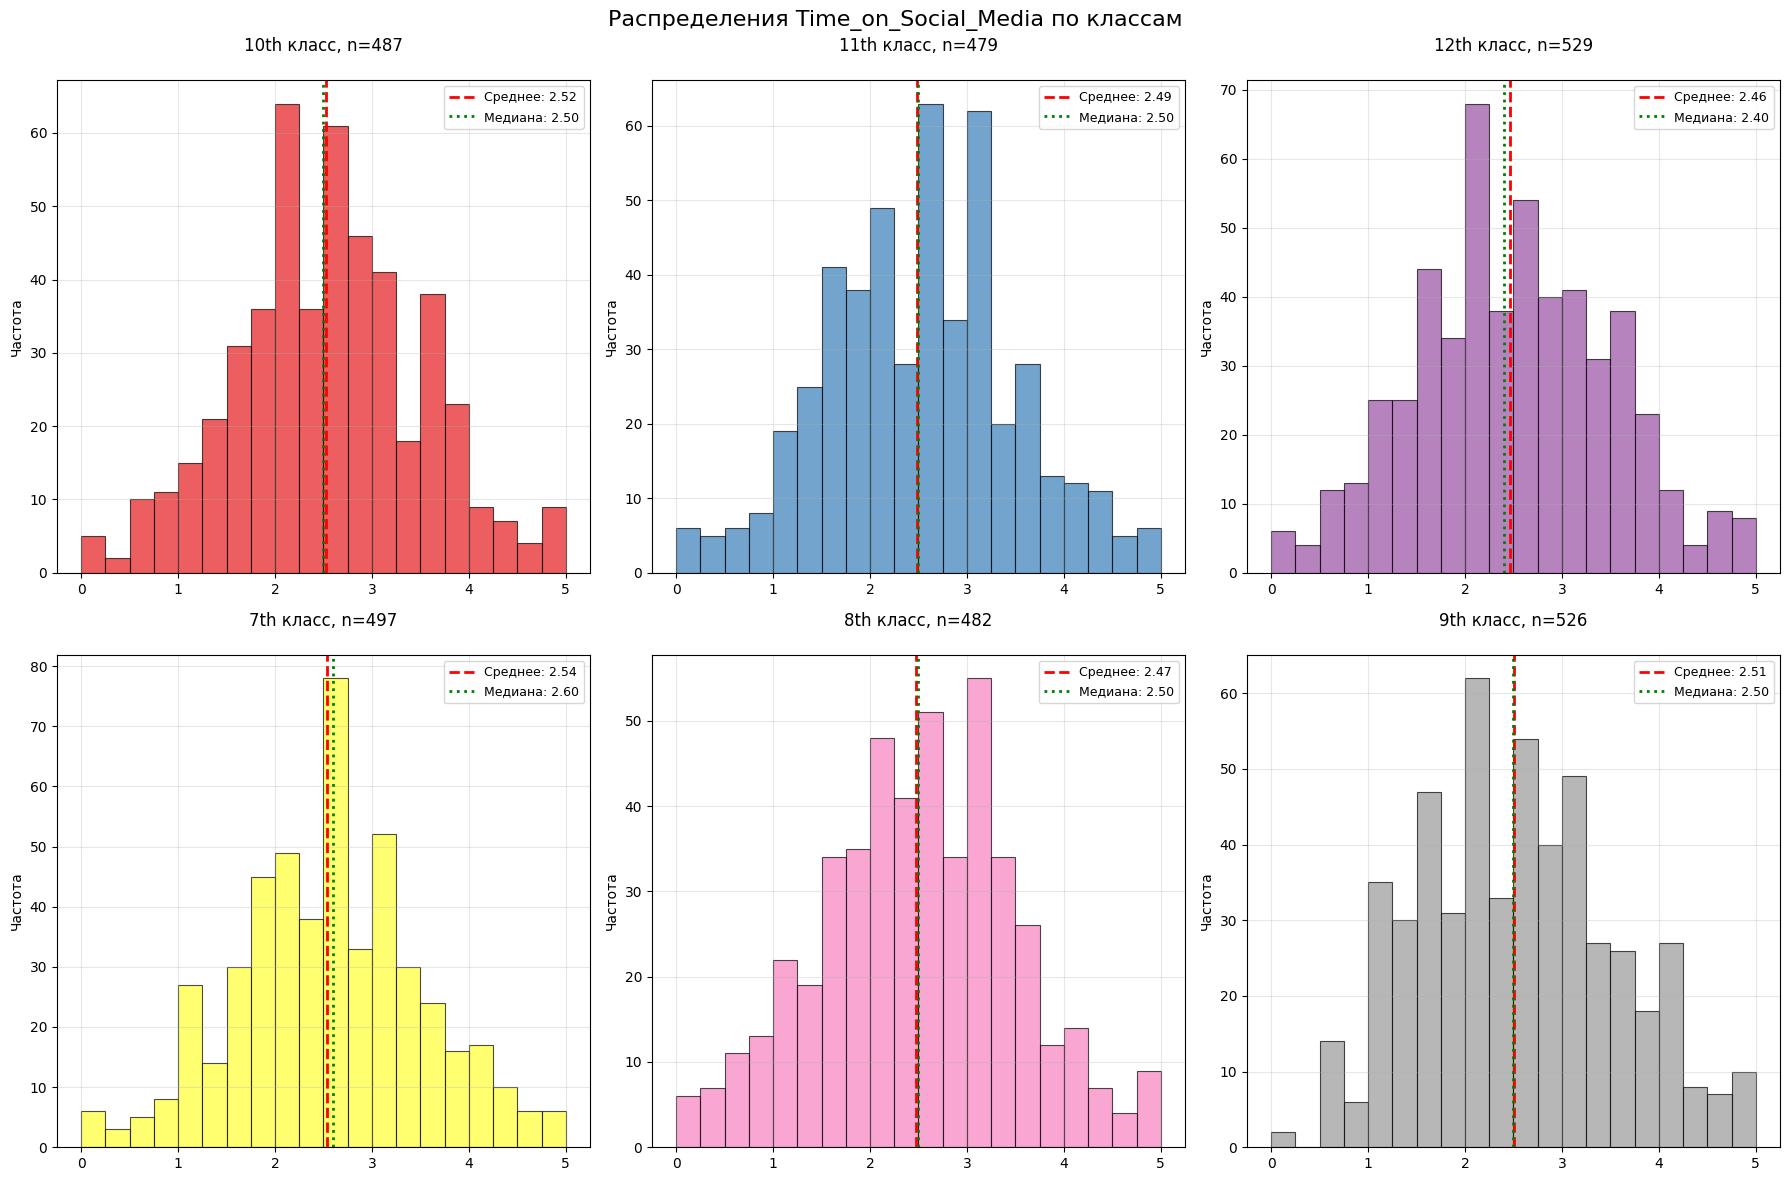

In [52]:
grades_list = list(class_groups.groups.keys())
n_grades = len(grades_list)

colors = plt.cm.Set1(np.linspace(0, 1, n_grades))

n_cols = 3
n_rows = (n_grades + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 6 * n_rows))

if n_rows == 1 and n_cols > 1:
    axes = axes.reshape(1, -1)
elif n_rows > 1 and n_cols == 1:
    axes = axes.reshape(-1, 1)
elif n_rows == 1 and n_cols == 1:
    axes = np.array([[axes]])

overall_min = time_feature.min()
overall_max = time_feature.max()
bins_range = (overall_min, overall_max)

for i, (grade, group_data) in enumerate(class_groups):
    row = i // n_cols
    col_idx = i % n_cols
    
    if n_rows == 1 and n_cols == 1:
        ax = axes[0, 0]
    else:
        ax = axes[row, col_idx]
    
    n_values, bins, patches = ax.hist(group_data, bins=20, 
                                     alpha=0.7, color=colors[i], 
                                     edgecolor='black', linewidth=0.8,
                                     range=bins_range)
    
    mean_val = group_data.mean()
    std_val = group_data.std()
    median_val = group_data.median()
    count = len(group_data)
    
    ax.set_title(f'{grade} класс, n={count}\n', 
                fontsize=12,)
    ax.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Среднее: {mean_val:.2f}')
    ax.axvline(median_val, color='green', linestyle=':', linewidth=2, 
               label=f'Медиана: {median_val:.2f}')
    
 
    ax.set_ylabel('Частота')
    ax.grid(True, alpha=0.3)
    ax.legend(fontsize=9)


for i in range(n_grades, n_rows * n_cols):
    row = i // n_cols
    col_idx = i % n_cols
    if n_rows == 1 and n_cols == 1:
        break
    axes[row, col_idx].remove()

plt.suptitle(f'Распределения Time_on_Social_Media по классам', fontsize=16, y=0.98)
plt.tight_layout()
plt.show()


Для всех классов статистики распределений групп очень похожи. Внутригрупповые значения статистик по большей части практически совпадают со значениями всей выборки. Межгрупповая дисперсия указывает, что средние значения между классами практически не различаются. Наиболее сильно к нормальному распределению приближена группа 8 класса, о чем свидетельствуют как значения статистик, так и гистограмма